# Expected error probabilities of the classical maximum a posteriori strategies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb, binom

In [2]:
# box and measurement parameters
N = 100 # half number of photons per box
alpha = 0

In [50]:
def likelihood( n , N = 1 , alpha = 0., box = "A"):

    P = np.zeros_like(n, dtype="float64")
    
    if box == "C":
        P += 2**(-2*N)*comb(2*N , n)
    else:
        if box == "A": p = np.cos(np.pi/8 + alpha)**2
        elif box == "B": p = np.cos(np.pi/8 - alpha)**2
        
        q = 1 - p
        
        kmin = np.maximum(0, n-N)
        kmax = np.minimum(n, N)
        
        for j in range(len(n)):
            for k in range(kmin[j],kmax[j] + 1):
                P[j] += comb(N , k)*comb(N, n[j] - k)*np.power(p, N - n[j] + 2*k)*np.power(q, N + n[j] - 2*k)
    
    return P

def EEP( LHA, LHB, LHC ): # expected error probability
    
    # inferring events when the maximum likelihood is well defined
    Ainfer_event = (LHA>LHB)*(LHA>LHC)
    Binfer_event = (LHB>LHA)*(LHB>LHC)
    Cinfer_event = (LHC>LHA)*(LHC>LHB)
    
    ABcoincidence = (LHA==LHB)*(LHA!=LHC)
    ACcoincidence = (LHA==LHC)*(LHA!=LHB)
    BCcoincidence = (LHB==LHC)*(LHA!=LHB)
    
    ABCcoincidence = (LHA==LHB)*(LHA==LHC)
    
    # EXPECTED CONDITIONAL SUCCESS PROBABILITIES
    ESPA = LHA[Ainfer_event].sum() # when the maximum likelihood is evidently A, infer A correctly
    ESPA += LHA[ABcoincidence].sum()/2+LHA[ACcoincidence].sum()/2. # when two likelihoods are equal, throw a dice
    ESPA += LHA[ABCcoincidence].sum()/3 # when the three likelihoods are equal, throw a three sided dice
    
    ESPB = LHB[Binfer_event].sum() # when the maximum likelihood is evidently B, infer B correctly
    ESPB += LHB[ABcoincidence].sum()/2+LHB[BCcoincidence].sum()/2. # when two likelihoods are equal, throw a dice
    ESPB += LHB[ABCcoincidence].sum()/3 # when the three likelihoods are equal, throw a three sided dice
    
    ESPC = LHC[Cinfer_event].sum() # when the maximum likelihood is evidently C, infer C correctly
    ESPC += LHC[ACcoincidence].sum()/2+LHC[BCcoincidence].sum()/2. # when two likelihoods are equal, throw a dice
    ESPC += LHC[ABCcoincidence].sum()/3 # when the three likelihoods are equal, throw a three sided dice
    
    EEP_dict = {
        "A": 1 - ESPA,
        "B": 1 - ESPB,
        "C": 1 - ESPC,
        "Overall": 1 - (ESPA+ESPB+ESPC)/3.
    }
    
    return EEP_dict

In [4]:
LHA = likelihood(np.arange(2*N), N, alpha, box="A")
LHB = likelihood(np.arange(2*N), N, alpha, box="B")
LHC = likelihood(np.arange(2*N), N, alpha, box="C")

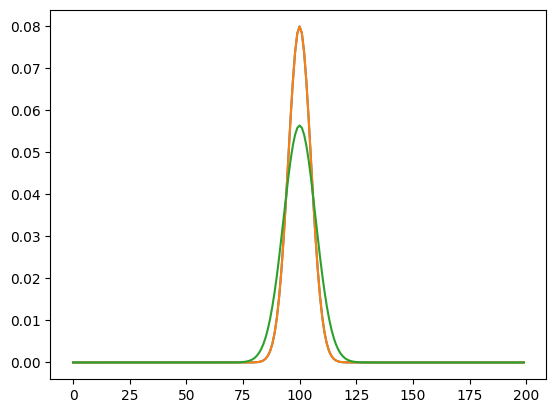

In [5]:
plt.plot(np.arange(2*N), LHA)
plt.plot(np.arange(2*N), LHB)
plt.plot(np.arange(2*N), LHC)

# For varying values of alpha, fixed N

In [ ]:
n_alphas = 101
alpha_range = np.linspace(-np.pi/8, np.pi/8, n_alphas)
N = 150

EEPs = np.zeros((n_alphas,4), dtype="object")

for j in range(n_alphas):
    LHA = np.round(likelihood(np.arange(2*N), N, alpha_range[j], box="A"), 12)
    LHB = np.round(likelihood(np.arange(2*N), N, alpha_range[j], box="B"), 12)
    LHC = np.round(likelihood(np.arange(2*N), N, alpha_range[j], box="C"), 12)
    
    EEPs[j] = np.array(list(EEP(LHA,LHB,LHC).values()))
    
np.save("EEP3BPvsAlpha_N{:d}.npy".format(2*N), EEPs)

In [ ]:
plt.plot(alpha_range,EEPs)